In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [137]:
filepath = 'data/diamonds.csv'

data = pd.read_csv(filepath)
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [52]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

# Data Modeling

In [54]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [55]:
cut_values = {"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4}
data.replace({'cut': cut_values}, inplace=True)

<AxesSubplot: xlabel='price', ylabel='Density'>

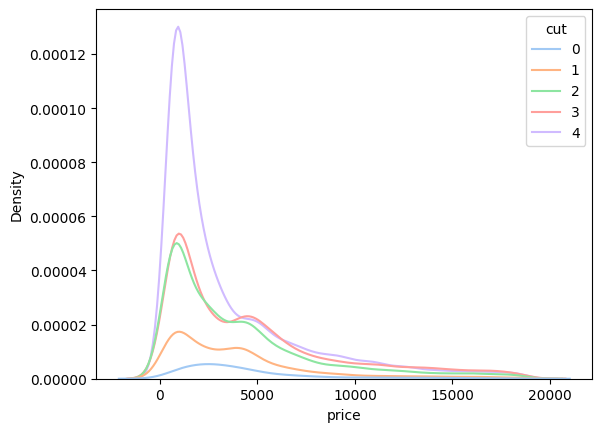

In [56]:
sns.kdeplot(data=data, x="price", hue="cut", palette="pastel")

In [57]:
data.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [58]:
color_values = {"J": 0, "I": 1, "H": 2, "G": 3, "F": 4, "E": 5, "D": 6}
data.replace({"color": color_values}, inplace=True)

<AxesSubplot: xlabel='price', ylabel='Density'>

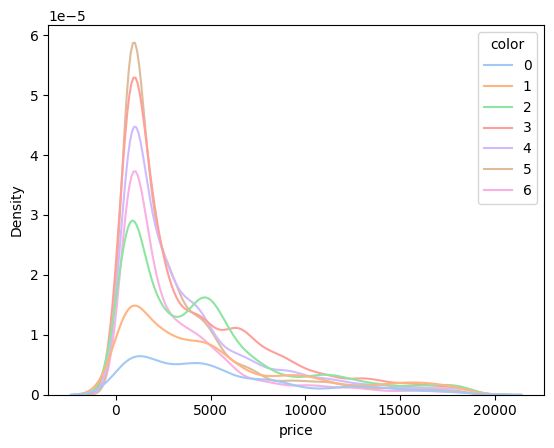

In [59]:
sns.kdeplot(data=data, x="price", hue="color", palette="pastel")

In [60]:
data.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [61]:
clarity_values = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
data.replace({"clarity": clarity_values}, inplace=True)

<AxesSubplot: xlabel='price', ylabel='Density'>

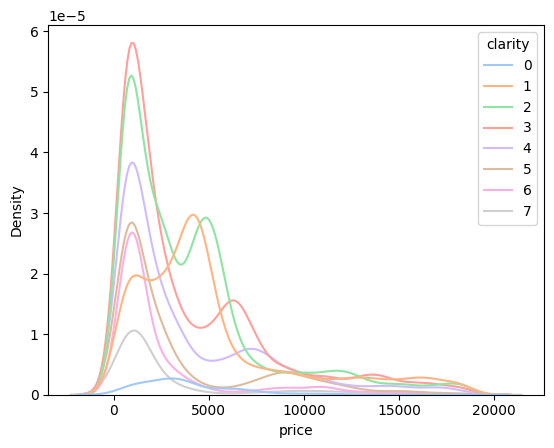

In [62]:
sns.kdeplot(data=data, x="price", hue="clarity", palette="pastel")

In [63]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot: >

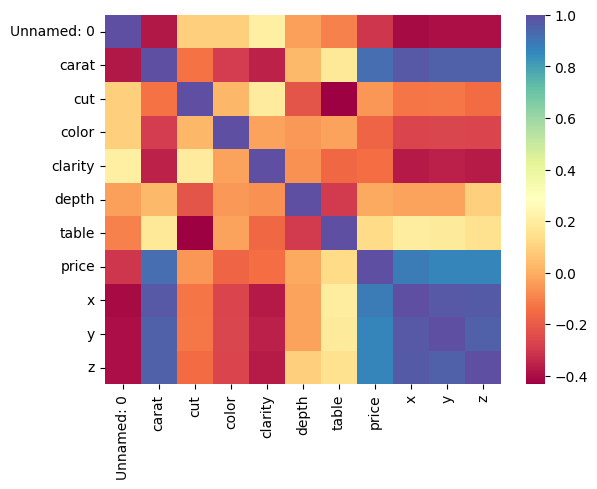

In [64]:
sns.heatmap(data.corr(), cmap=sns.color_palette("Spectral", as_cmap=True))

---

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
dataX = data.loc[:,["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"]]
datay = data.loc[:,"price"]
X_train, X_test, y_train, y_test = train_test_split(dataX, datay, test_size=.2)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
st_scaler = StandardScaler()
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.transform(X_test)

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Selection

In [193]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)

pred_decision_tree_regressor = decision_tree_regressor.predict(X_test)
error_decision_tree = pred_decision_tree_regressor - y_test
mae = mean_absolute_error(y_test, pred_decision_tree_regressor)
mse = mean_squared_error(y_test, pred_decision_tree_regressor)
r2 = r2_score(y_test, pred_decision_tree_regressor)

score_decision_tree = {"mean_squared_error": mse, "mean_absolute_error": mae, "r2_score": r2}
score_decision_tree

{'mean_squared_error': 537600.2175282207,
 'mean_absolute_error': 356.27510505499936,
 'r2_score': 0.9656503064624568}

In [190]:
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)

pred_random_forest_regressor = random_forest_regressor.predict(X_test)
error_random_forest = pred_random_forest_regressor - y_test
mae = mean_absolute_error(y_test, pred_random_forest_regressor)
mse = mean_squared_error(y_test, pred_random_forest_regressor)
r2 = r2_score(y_test, pred_random_forest_regressor)

score_random_forest = {"mean_squared_error": mse, "mean_absolute_error": mae, "r2_score": r2}
score_random_forest

{'mean_squared_error': 260310.95391376773,
 'mean_absolute_error': 256.4081233998976,
 'r2_score': 0.9833675634795774}

In [194]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

pred_linear_regression = linear_regression.predict(X_test)
error_linear_regression = pred_linear_regression - y_test
mae = mean_absolute_error(y_test, pred_linear_regression)
mse = mean_squared_error(y_test, pred_linear_regression)
r2 = r2_score(y_test, pred_linear_regression)

score_linear_regression = {"mean_squared_error": mse, "mean_absolute_error": mae, "r2_score": r2}
score_linear_regression

{'mean_squared_error': 1439021.1343321567,
 'mean_absolute_error': 805.4871970541,
 'r2_score': 0.9080544736651587}

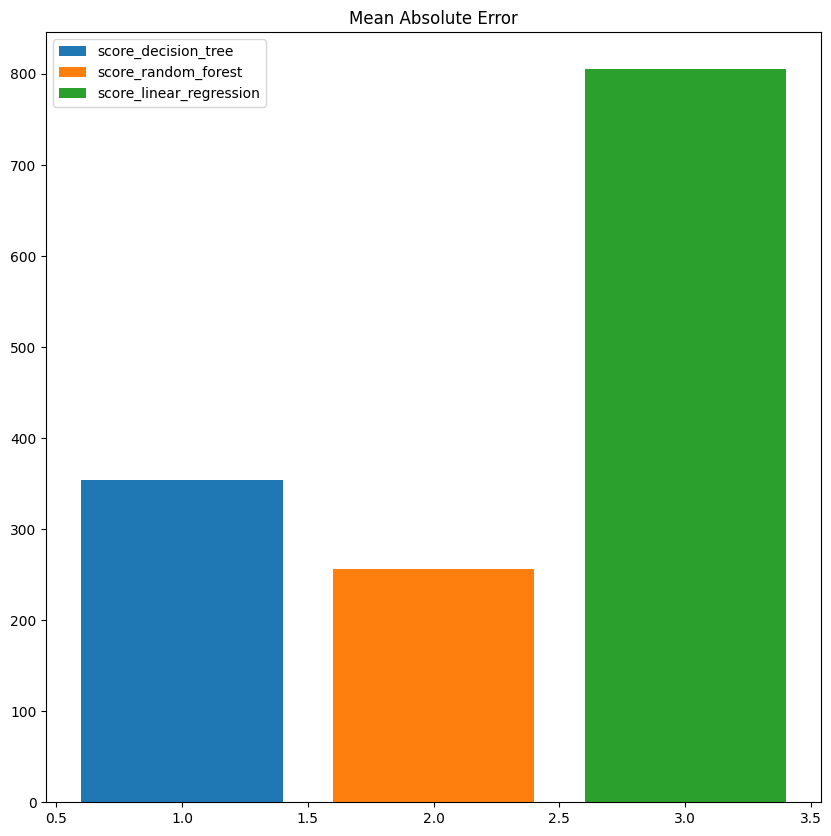

In [158]:
plt.figure(figsize=(10,10))
plt.title('Mean Absolute Error')
plt.bar(1, score_decision_tree['mean_absolute_error'], label='score_decision_tree')
plt.bar(2, score_random_forest['mean_absolute_error'], label='score_random_forest')
plt.bar(3, score_linear_regression['mean_absolute_error'], label='score_linear_regression')
plt.legend()

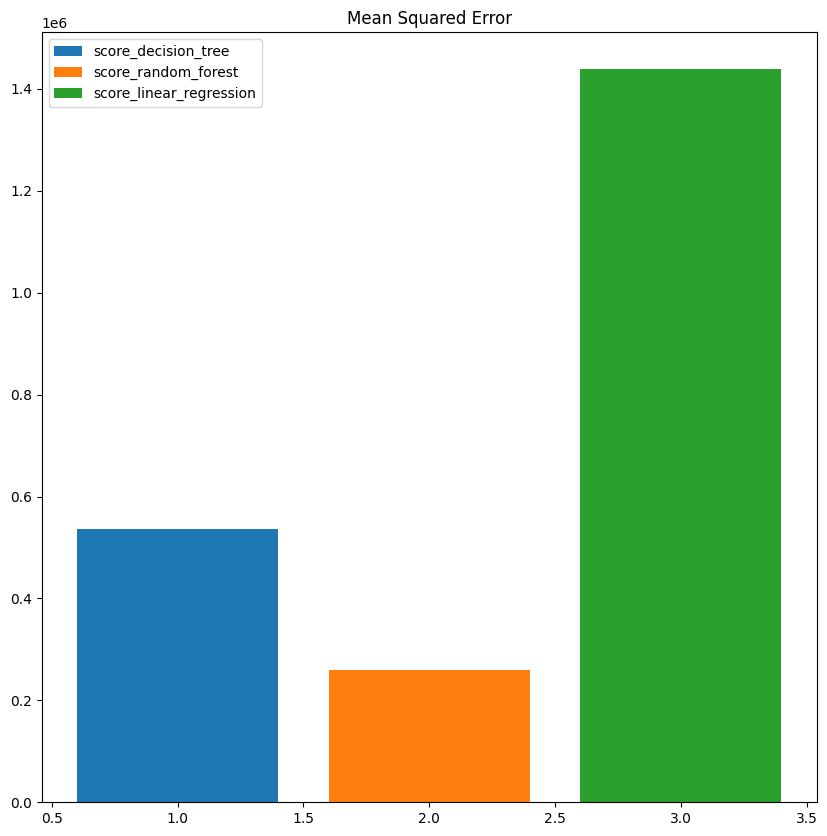

In [157]:
plt.figure(figsize=(10,10))
plt.title('Mean Squared Error')
plt.bar(1, score_decision_tree['mean_squared_error'], label='score_decision_tree')
plt.bar(2, score_random_forest['mean_squared_error'], label='score_random_forest')
plt.bar(3, score_linear_regression['mean_squared_error'], label='score_linear_regression')
plt.legend()

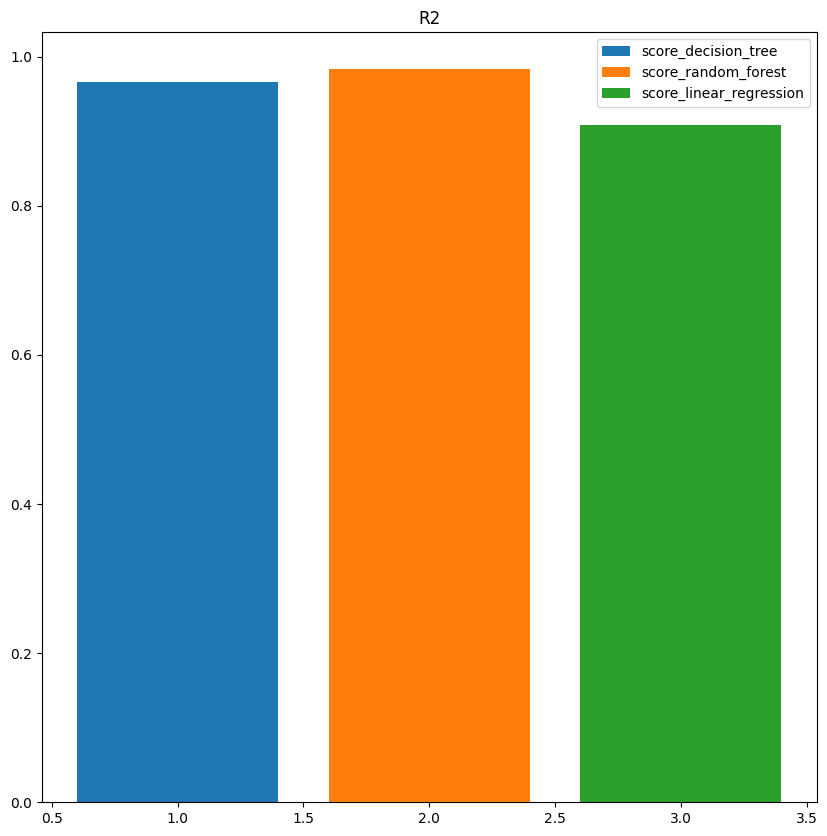

In [159]:
plt.figure(figsize=(10,10))
plt.title('R2')
plt.bar(1, score_decision_tree['r2_score'], label='score_decision_tree')
plt.bar(2, score_random_forest['r2_score'], label='score_random_forest')
plt.bar(3, score_linear_regression['r2_score'], label='score_linear_regression')
plt.legend()

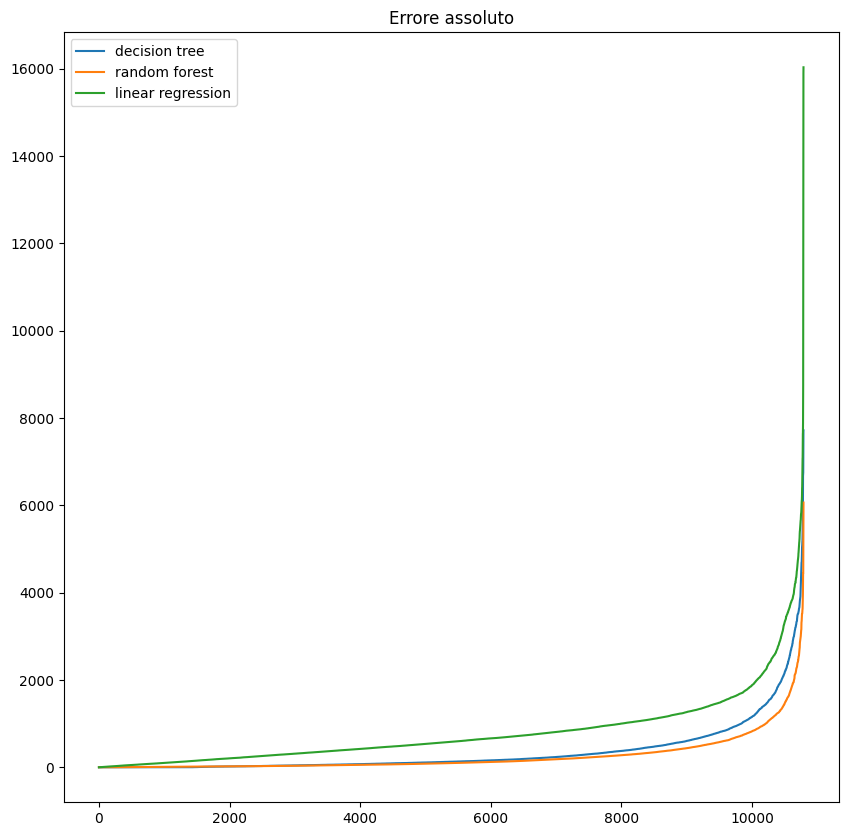

In [203]:
plt.figure(figsize=(10,10))
plt.title('Errore assoluto')
plt.plot(error_decision_tree.abs().sort_values().values.squeeze(), label='decision tree')
plt.plot(error_random_forest.abs().sort_values().values.squeeze(), label='random forest')
plt.plot(error_linear_regression.abs().sort_values().values.squeeze(), label='linear regression')
plt.legend()

Modello migliore/scelto: Random Forest Regressor, in quanto ha errori minori e r2 maggiore

# Model Optimization

Ottimizzazione del Random forest regressor

In [71]:
from sklearn.model_selection import GridSearchCV

### Parametri testati molte volte, i migliori trovati grazie alla grid search sono: min_samples_split => 12, min_samples_lead =>2

In [116]:
grid_search_params_for_random_forest_regressor = {
    "min_samples_split" : [11, 12, 13],
    'min_samples_leaf' : [1,2,3]
} # best params: min_samples_split => 12, min_samples_lead =>2,

In [117]:
random_forest_regressor = RandomForestRegressor()

In [118]:
grid_search = GridSearchCV(random_forest_regressor, param_grid=grid_search_params_for_random_forest_regressor, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........min_samples_leaf=1, min_samples_split=11; total time=   8.5s
[CV] END ...........min_samples_leaf=1, min_samples_split=11; total time=   8.4s
[CV] END ...........min_samples_leaf=1, min_samples_split=11; total time=   8.4s
[CV] END ...........min_samples_leaf=1, min_samples_split=11; total time=   8.5s
[CV] END ...........min_samples_leaf=1, min_samples_split=11; total time=   8.5s
[CV] END ...........min_samples_leaf=1, min_samples_split=12; total time=   8.2s
[CV] END ...........min_samples_leaf=1, min_samples_split=12; total time=   8.2s
[CV] END ...........min_samples_leaf=1, min_samples_split=12; total time=   8.2s
[CV] END ...........min_samples_leaf=1, min_samples_split=12; total time=   8.3s
[CV] END ...........min_samples_leaf=1, min_samples_split=12; total time=   8.2s
[CV] END ...........min_samples_leaf=1, min_samples_split=13; total time=   8.1s
[CV] END ...........min_samples_leaf=1, min_sampl

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [11, 12, 13]},
             verbose=2)

In [119]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_leaf=2, min_samples_split=12)

## Best params: min_samples_split => 12, min_samples_leaf =>2

In [195]:
random_forest_regressor_improved = RandomForestRegressor(min_samples_split=12, min_samples_leaf=2)
random_forest_regressor_improved.fit(X_train, y_train)

pred_random_forest_regressor_improved = random_forest_regressor_improved.predict(X_test)
error_random_forest_improved =  pred_random_forest_regressor_improved - y_test
mae = mean_absolute_error(y_test, pred_random_forest_regressor_improved)
mse = mean_squared_error(y_test, pred_random_forest_regressor_improved)
r2 = r2_score(y_test, pred_random_forest_regressor_improved)

score_random_forest_improved = {"mean_squared_error": mse, "mean_absolute_error": mae, "r2_score": r2}
score_random_forest_improved

{'mean_squared_error': 255814.5030096926,
 'mean_absolute_error': 256.3442485300121,
 'r2_score': 0.9836548619320813}

Text(1.75, 256.3474422735064, 'Random Forest Improved')

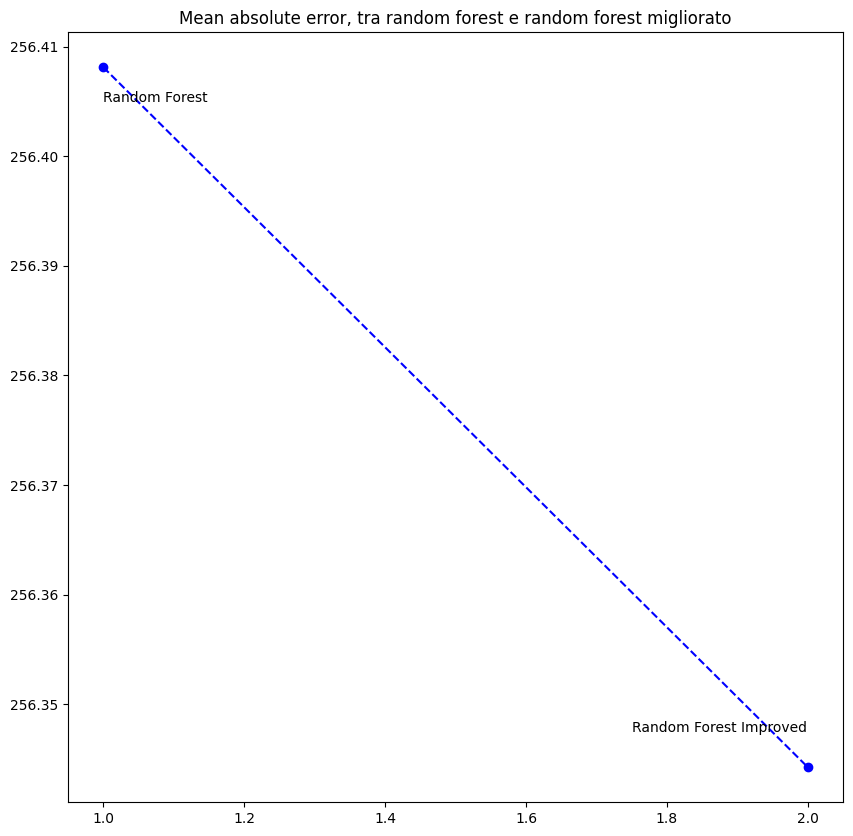

In [225]:
plt.figure(figsize=(10,10))
plt.title('Mean absolute error, tra random forest e random forest migliorato')
plt.plot([1,2], [score_random_forest['mean_absolute_error'],score_random_forest_improved['mean_absolute_error']], 'bo', linestyle="--")
plt.text(1, score_random_forest['mean_absolute_error'] - 0.05 *(score_random_forest['mean_absolute_error'] - score_random_forest_improved['mean_absolute_error']) , "Random Forest")
plt.text(2 - .25, score_random_forest_improved['mean_absolute_error'] + 0.05 *(score_random_forest['mean_absolute_error'] - score_random_forest_improved['mean_absolute_error']) , "Random Forest Improved")

Text(1.75, 256039.32555489635, 'Random Forest Improved')

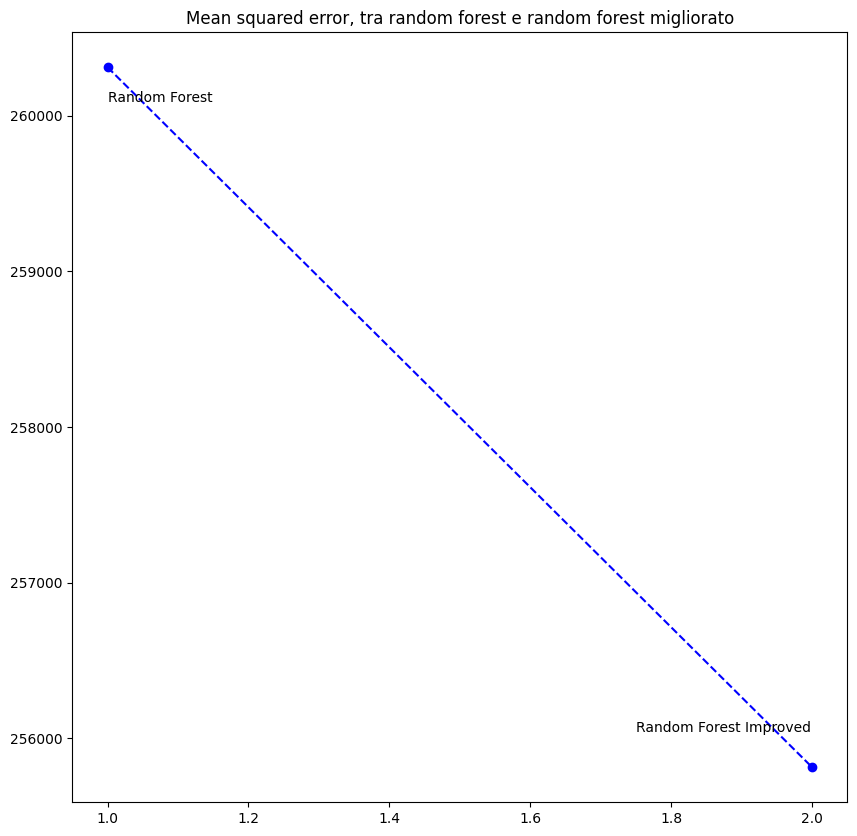

In [224]:
plt.figure(figsize=(10,10))
plt.title('Mean squared error, tra random forest e random forest migliorato')
plt.plot([1,2], [score_random_forest['mean_squared_error'],score_random_forest_improved['mean_squared_error']], 'bo', linestyle="--")
plt.text(1, score_random_forest['mean_squared_error'] - 0.05 *(score_random_forest['mean_squared_error'] - score_random_forest_improved['mean_squared_error']) , "Random Forest")
plt.text(2 - .25, score_random_forest_improved['mean_squared_error'] + 0.05 *(score_random_forest['mean_squared_error'] - score_random_forest_improved['mean_squared_error']) , "Random Forest Improved")

Text(1.75, 0.9836404970094561, 'Random Forest Improved')

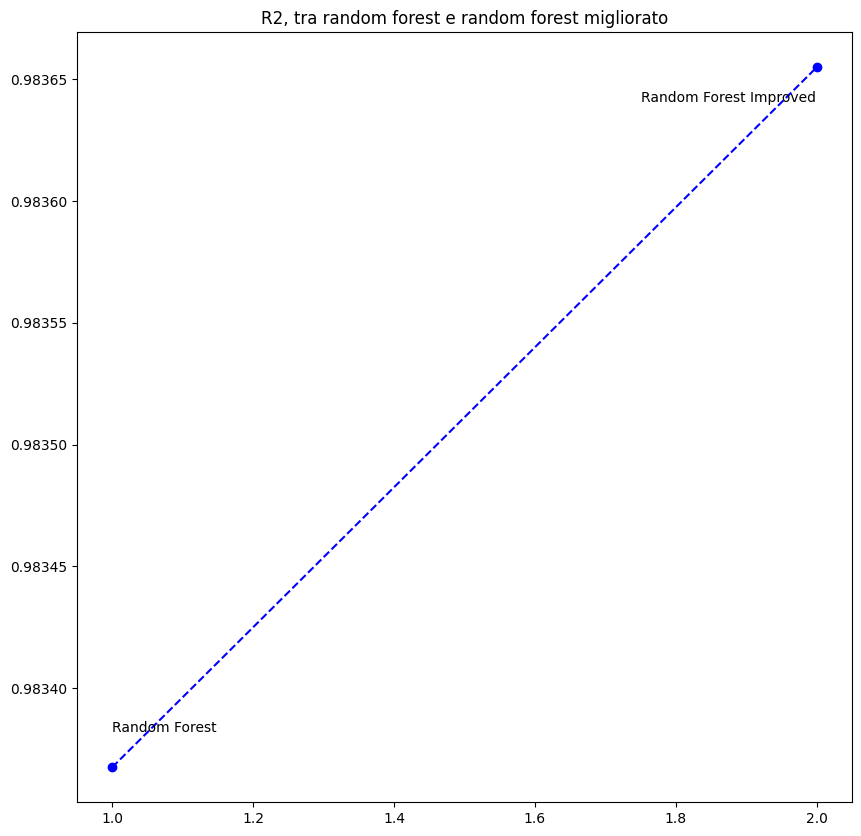

In [223]:
plt.figure(figsize=(10,10))
plt.title('R2, tra random forest e random forest migliorato')
plt.plot([1,2], [score_random_forest['r2_score'],score_random_forest_improved['r2_score']], 'bo', linestyle="--")
plt.text(1, score_random_forest['r2_score'] - 0.05 *(score_random_forest['r2_score'] - score_random_forest_improved['r2_score']) , "Random Forest")
plt.text(2 - .25, score_random_forest_improved['r2_score'] + 0.05 *(score_random_forest['r2_score'] - score_random_forest_improved['r2_score']) , "Random Forest Improved")